# KC House Price Prediction Problem :

## Name :  Sahil Gupta

## Roll no. :  D21030

In [1]:
#Getting the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Graphs

In [2]:
os.getcwd()     #to get the current working directory

'C:\\Users\\Lenovo\\Documents\\Codes\\IML End Term'

In [3]:
dataset_2 = pd.read_csv("kc_house_train_data.csv")   #reading the training data from the csv file.
dataset_2.shape

(9761, 21)

In [4]:
pd.pandas.set_option('display.max_columns',None)  #displaying all the columns from the data

In [5]:
dataset_2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [6]:
Graphs.Graphs(dataset_2)

In [7]:
#We use the graphs function to plot the boxplot and histogram for all the numerical variables.

# EDA :

#### In data analysis we will analyse and find out the following
1. Missing values
2. All numerical variables
3.Distribution of numerical variables
4. All categorical variables
5.Distribution of categorical variables
6.Outliers
7. Relationship between independent and dependent features(Price)

## Missing values :

In [8]:
dataset_2.isnull().sum()   #finding the missing values in the data set if any

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Result:-
Here in our dataset we do not have any missing values. Hence we go forward with finding out the numerical and categorical variables.

### Numerical variables:

Here we sepearate the numerical variables from the dataset for further exploration.

In [9]:
numericals = [feature for feature in dataset_2.columns if dataset_2[feature].dtypes != 'object']
print('No.of numerical variables = ', len(numericals))

No.of numerical variables =  20


In [10]:
dataset_2[numericals].head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [11]:
dataset_2[numericals].describe()               #7-point description of all numerical variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


### Date-time variables:-

Here in the dataset we have 2 year variables.We have to extract information from these variables like no.of years or no.of days.

In [12]:
# list of variables that contain year features
years_feature = [feature for feature in numericals if 'yr' in feature]
years_feature

['yr_built', 'yr_renovated']

In [13]:
# Understanding the year feature
for feature in years_feature:
    print(feature,dataset_2[feature].unique())

yr_built [1965 2001 1942 1927 1977 1979 1916 1947 1995 1985 1941 1915 1948 1981
 1996 2014 1959 2003 1966 1953 1955 1950 1954 1989 1968 1973 2005 1956
 2002 1952 1925 1961 1988 1939 1975 1980 1992 1910 1991 2010 1987 1914
 1978 2004 1986 1923 1960 1990 1962 1976 1949 2008 1920 2007 1997 1994
 1993 1999 1983 1904 1940 1928 2006 1937 1982 1969 1929 1957 1964 1913
 1984 1908 1943 1922 1911 1930 1907 2013 1958 1998 1967 1909 1974 1972
 1912 1917 1900 2000 1924 1951 1932 1971 1946 1963 2012 1970 1944 1918
 1905 2009 1936 1926 1906 1902 1938 1919 1903 1921 1931 1901 1933 1945
 2011 1935 2015 1934]
yr_renovated [   0 1992 1994 1978 2005 2008 1984 2014 1974 1983 2013 2003 1945 1990
 1988 1957 1977 1995 2000 1999 1986 2007 1987 1973 2006 2001 1980 1997
 2002 1950 1991 2015 1989 1963 1962 1996 1981 1972 1970 1985 2004 1982
 1993 2010 2011 1971 2009 1998 1969 1940 1976 2012 1946 1964 1975 1953
 1958 1959 1967 1968 1956 1955 1960 1979 1965]


Year renovated = 0 signifies that the house has not been renovated.

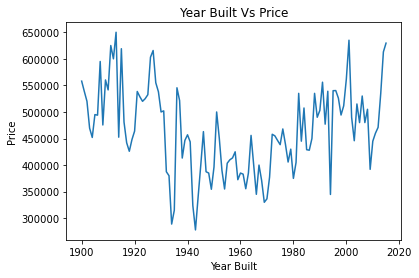

In [14]:
# Examining Datetime feature wit respect to price
# Understanding whether there is a relationship between Year the house is built and Price 

dataset_2.groupby('yr_built')['price'].median().plot()    #plot of year built vs price of house grouped by the year
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Year Built Vs Price")
plt.show()

The above graph represents the trend of house prices across the years.

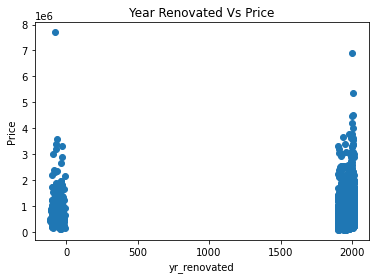

In [15]:
# Here we compare Datetime variables with Price

for feature in years_feature:
    if feature != 'yr_built':                             #plotting for year renovated vs price
        data = dataset_2.copy()  #creating a copy of our dataset
        data[feature] = data['yr_built'] - data[feature]
        
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel("Price")
        plt.title("Year Renovated Vs Price")
        plt.show()

Here we see that if the house is recently renovated then the price of the house is high. 

#### Numerical variables are of two types:
1. Continous 
2. Discrete

We separate the continous and discrete variables for further exploration.

In [16]:
# Checking discrete variables 
discrete_feature = [feature for feature in numericals if len(dataset_2[feature].unique()) < 25 and feature not in years_feature+['id']]
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [17]:
# Checking continous variables
continous_feature = [feature for feature in numericals if feature not in discrete_feature + years_feature + ['id']]
continous_feature

['price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

##### We plot histograms to check the skewness for continous variables.

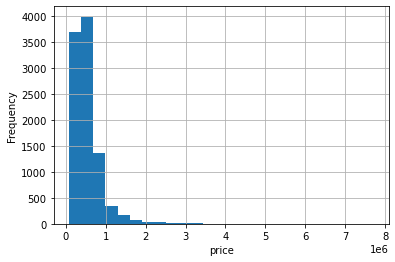

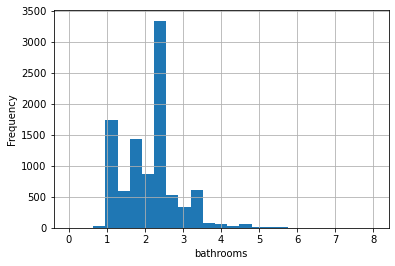

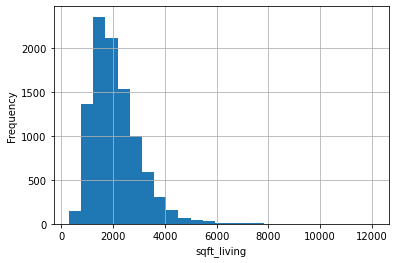

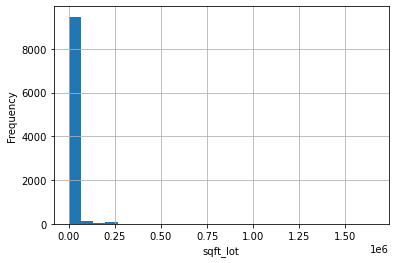

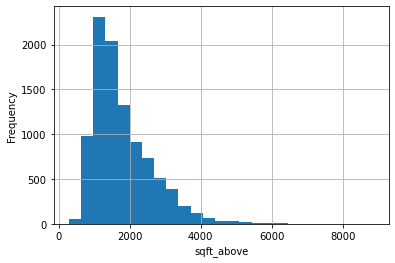

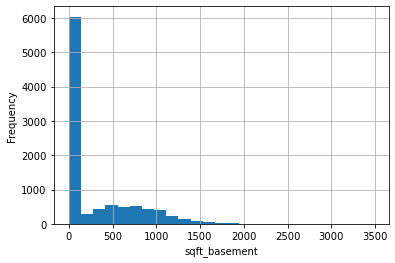

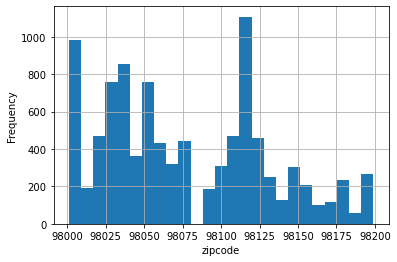

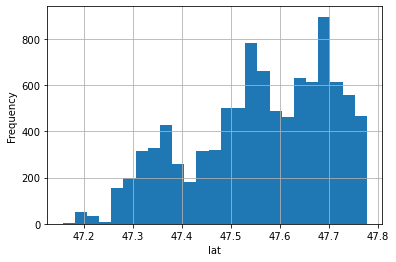

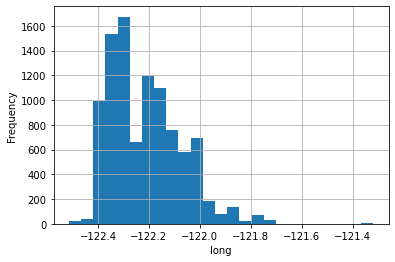

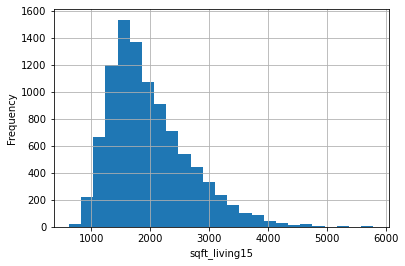

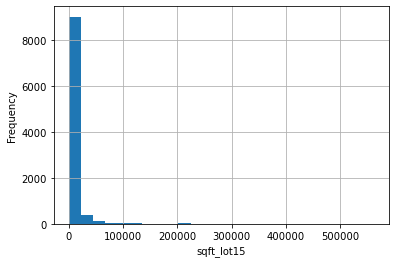

In [18]:
for feature in continous_feature:
    data=dataset_2.copy()               #copying data into another dataset for plotting so as to keep the original data.
    data[feature].hist(bins=25)         #plotting histogram for each continous variable in the feature list
    plt.xlabel(feature)                 #displaying the x and the y labels
    plt.ylabel("Frequency")
    plt.show()

Some of the features have normal distribution and some of them are skewed. If data is skewed we transform it into log normal distribution.

We plot the bar plots to study the relationship of discrete variables with price.

In [19]:
dataset_2[discrete_feature].head()

,bedrooms,floors,waterfront,view,condition,grade
0,4,1.0,0,0,5,7
1,4,1.0,0,0,3,11
2,2,1.0,0,0,4,7
3,3,1.5,0,0,4,7
4,3,1.0,0,0,4,7


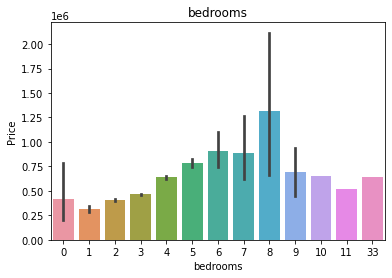

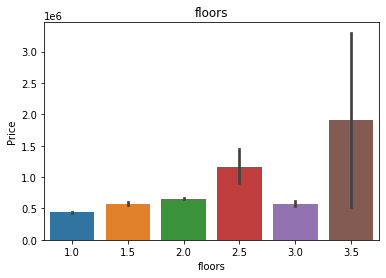

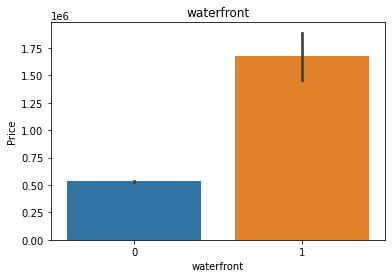

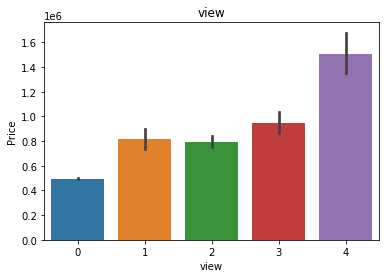

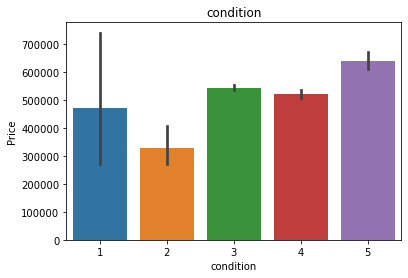

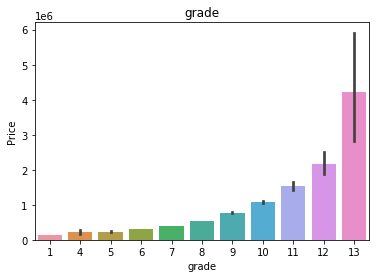

In [20]:
# Finding relationship between discrete feature and price

for feature in discrete_feature:        #plotting bar plota for all the variables in the feature list
    sns.barplot(x = feature , y = 'price' , data = dataset_2 )  
    
    plt.xlabel(feature)                 #displaying the x and the y labels
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

Here the relationship between grade and price is exponential.

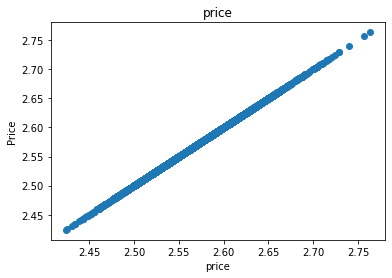

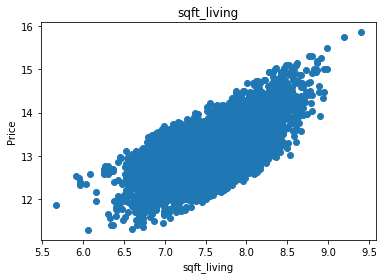

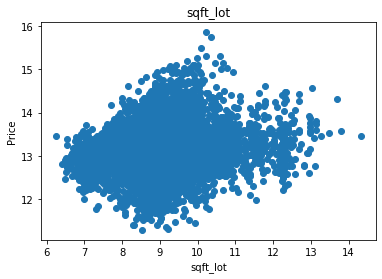

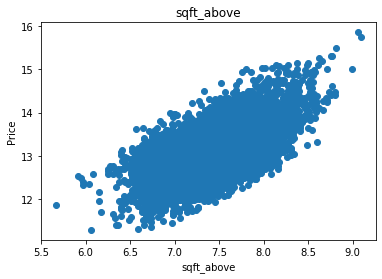

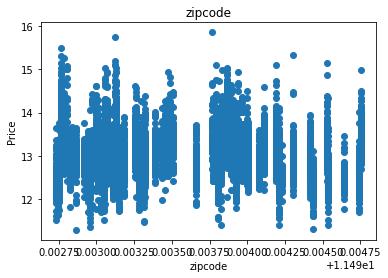

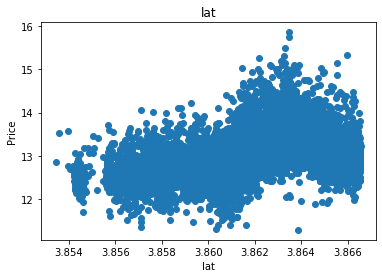

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


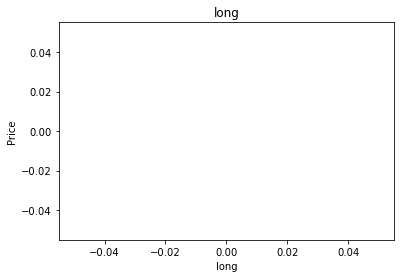

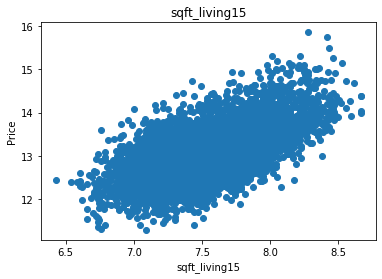

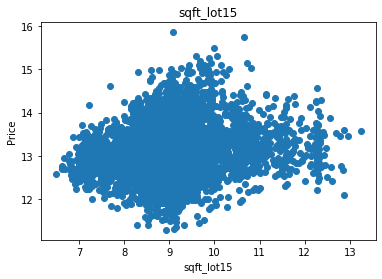

In [21]:
# We will be using log transformation
#plotting the scatter plots to study the relationship between the price and the features.
#this will help us in understanding how price is dependent on a variable and also deciding the predictors.
for feature in continous_feature:
    data = dataset_2.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['price'] = np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Here we can see that all the features have monotonic relationship with Price. And we can also see the have a positive correlation. As sqft_living increases the sales price of the house also increases, and same is for rest of the features.

## Outliers :

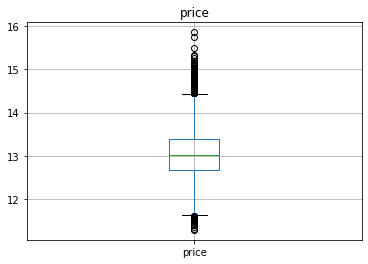

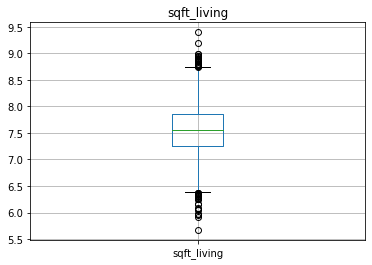

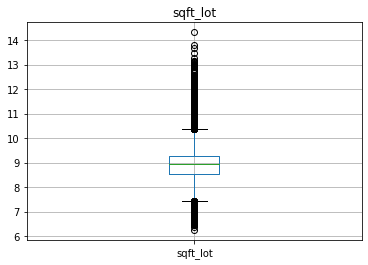

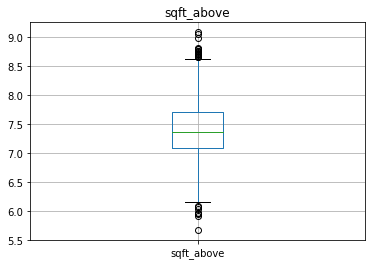

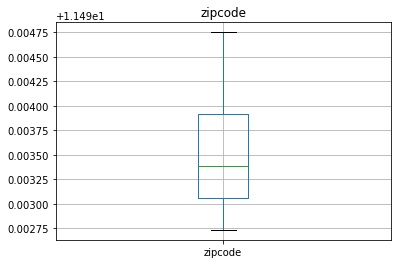

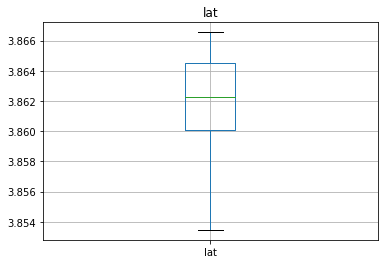

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


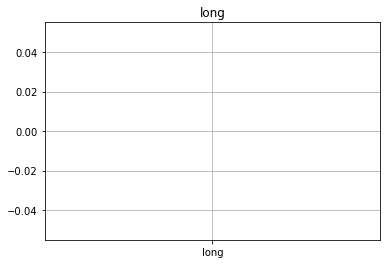

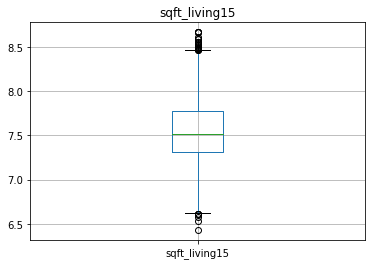

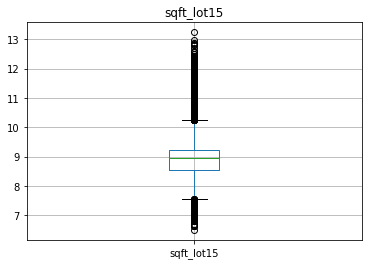

In [22]:
#plotting the box plots of features in the dataset to check for outliers
for feature in continous_feature:
    data = dataset_2.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        #plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Here we see that there are lot of outliers in the data. 

## Categorical Variables :

In [23]:
categorical_feature = [feature for feature in dataset_2.columns if data[feature].dtypes=='O']
categorical_feature

['date']

In [24]:
dataset_2[categorical_feature].head()

,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000


In [25]:
for feature in categorical_feature:
    print(feature,len(dataset_2[feature].unique()))       #getting no.of unique categorical features

date 357


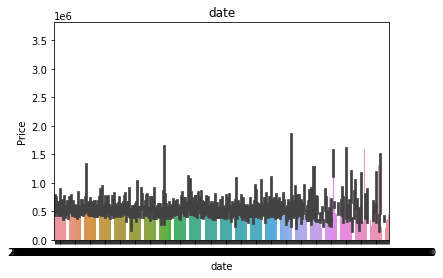

In [26]:
# Finding out relationship between categorical variable and Price
for feature in categorical_feature:
    data=dataset_2.copy()
    sns.barplot(x = feature , y = 'price' , data = data )
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

## Model Fitting :

Here we try to fit Linear regression models on the train data and compute the R-squared and the RMSE values by doing a  10 fold cross validation on the training data.

#### Model 1 :

In [27]:
X = dataset_2[['sqft_living']]         #taking sqft_living as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [30]:
#perform 10 fold cross validation to get the cross validation scores

In [31]:
from sklearn.model_selection import cross_val_score          
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()                                    #taking the mean of the score

In [32]:
np.round(cv_scores,2)

0.49

In [33]:
from sklearn.model_selection import cross_val_score          
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()                                    #taking the mean of the score

In [34]:
np.round(np.abs(cv_scores),2)

268686.24

#### Model 2 :

In [35]:
X = dataset_2[['sqft_living','grade']] #taking sqft_living and grade as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [38]:
#perform 10 fold cross validation to get the cross validation scores

In [39]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()

In [40]:
np.round(cv_scores,2)

0.53

In [41]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()

In [42]:
np.round(np.abs(cv_scores),2)

258217.71

#### Model 3 :

In [43]:
X = dataset_2[['bedrooms','bathrooms','sqft_living','grade']] #taking bedrooms, bathrooms, sqft_living and grade as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [46]:
#perform 10 fold cross validation to get the cross validation scores

In [47]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()

In [48]:
np.round(cv_scores,2)

0.54

In [49]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()

In [50]:
np.round(np.abs(cv_scores),2)

256259.24

#### Here we find that as we increase the number of predictors we get a better CV score.  



#### To further improve the model we apply feature engineering techniques like scaling, log transform and data encoding.

## Feature Engineering :

#### 1. We transform the variable yr_built to the age of house in years.

In [51]:
dataset_2 = pd.read_csv("kc_house_train_data.csv")   #reading the data

In [52]:
dataset_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [53]:
dataset_2.yr_built = int(2021) - dataset_2.yr_built   #transforming by taking the difference from current year i.e 2021.

In [54]:
dataset_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,56,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,20,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,79,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,94,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,44,0,98074,47.6127,-122.045,1370,10208


#### 2. We have seen that the numerical variables were skewed. Let us handle them taking the log transform of these variables.

In [55]:
dataset_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,56,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,20,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,79,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,94,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,44,0,98074,47.6127,-122.045,1370,10208


##### Here we should only take log transform of non-negative and non-zero columns. If we take log of negative and zero columns we might get NaN values.

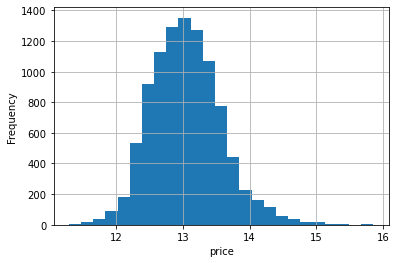

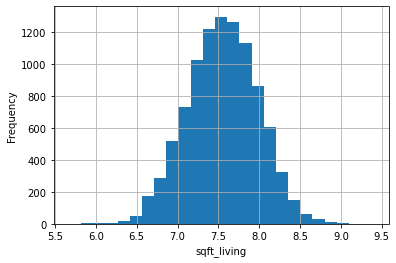

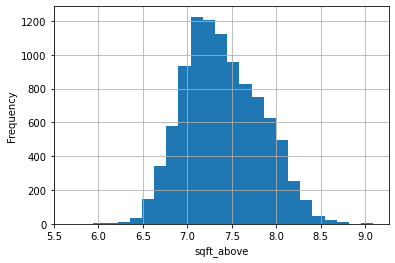

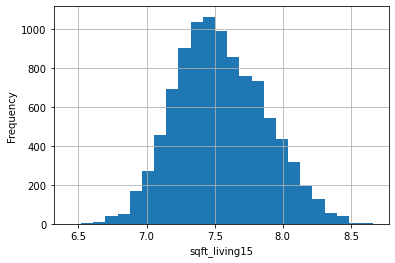

In [56]:
# Converting skewed distribution into log normal distribution
num_feature = ['price','sqft_living','sqft_above','sqft_living15']    #creating a list of all the skewed features

for feature in num_feature:
    dataset_2[feature] = np.log(dataset_2[feature])      #taking log of all the variables that were skewed.
    dataset_2[feature].hist(bins=25)               #plotting histogram for each continous variable in the feature list
    plt.xlabel(feature)                            #displaying the x and the y labels
    plt.ylabel("Frequency")
    plt.show()

### From the above plotted graphs we have eliminated the skewness and have Log normal distribution.

In [57]:
dataset_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,6.956545,910,56,0,98136,47.5208,-122.393,7.215240,5000
1,7237550310,20140512T000000,14.018451,4,4.50,8.597851,101930,1.0,0,0,3,11,8.266164,1530,20,0,98053,47.6561,-122.005,8.468003,101930
2,9212900260,20140527T000000,13.056224,2,1.00,7.056175,6000,1.0,0,0,4,7,6.756932,300,79,0,98115,47.6900,-122.292,7.192934,6000
3,114101516,20140528T000000,12.644328,3,1.00,7.265430,19901,1.5,0,0,4,7,7.265430,0,94,0,98028,47.7558,-122.229,7.484369,12697
4,6054650070,20141007T000000,12.899220,3,1.75,7.222566,9680,1.0,0,0,4,7,7.222566,0,44,0,98074,47.6127,-122.045,7.222566,10208


## Feature Scaling :

####  3. In this particular dataset we have many features which have different units. Hence it is necessary we do feature scaling to                   apply a particular machine learning algorithm.

MinMaxScaler scales all the values between 0 and 1.

In [58]:
feature_scaler = [feature for feature in dataset_2.columns if feature not in ['id','price','date']]   
#scaling all the features except id,date and price as they are irrelevant here

from sklearn.preprocessing import MinMaxScaler         #importing minmax scaler
scaler  = MinMaxScaler()
scaler.fit(dataset_2[feature_scaler])                 #fitting scaled values to our dataset

MinMaxScaler()

In [59]:
data = pd.concat([dataset_2[['id','price','date']].reset_index(drop=True),
                 pd.DataFrame(scaler.transform(dataset_2[feature_scaler]),columns=feature_scaler)],axis=1)

#concatinating id,price and date to our scaled dataset

In [60]:
data.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,13.311329,20141209T000000,0.121212,0.37500,0.512705,0.002714,0.0,0.0,0.0,1.00,0.500000,0.376281,0.261494,0.434783,0.0,0.681818,0.586939,0.101255,0.351594,0.007751
1,7237550310,14.018451,20140512T000000,0.121212,0.56250,0.785623,0.061429,0.0,0.0,0.0,0.50,0.833333,0.759276,0.439655,0.121739,0.0,0.262626,0.804568,0.425941,0.912323,0.180853
2,9212900260,13.056224,20140527T000000,0.060606,0.12500,0.371966,0.003320,0.0,0.0,0.0,0.75,0.500000,0.317905,0.086207,0.634783,0.0,0.575758,0.859096,0.185774,0.341610,0.009536
3,114101516,12.644328,20140528T000000,0.090909,0.12500,0.428112,0.011740,0.2,0.0,0.0,0.75,0.500000,0.466614,0.000000,0.765217,0.0,0.136364,0.964935,0.238494,0.472055,0.021496
4,6054650070,12.899220,20141007T000000,0.090909,0.21875,0.416611,0.005549,0.0,0.0,0.0,0.75,0.500000,0.454078,0.000000,0.330435,0.0,0.368687,0.734760,0.392469,0.354873,0.017051


## Feature engineering and Scaling on test data:

In [61]:
dataset_test = pd.read_csv("kc_house_test_data.csv")             #reading the test data

In [62]:
dataset_test.yr_built = int(2021) - dataset_test.yr_built #transforming by taking the difference from current year i.e 2021.

In [63]:
dataset_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,18,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,121,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,100,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,92,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,52,0,98001,47.3341,-122.282,1290,7800


In [64]:
# Converting skewed distribution into log normal distribution
num_feature = ['price','sqft_living','sqft_above','sqft_living15']

for feature in num_feature:
    dataset_test[feature] = np.log(dataset_test[feature])         #taking log of all the variables that were skewed.

In [65]:
dataset_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,12.685408,3,2.50,7.544332,6560,2.0,0,0,3,7,7.544332,0,18,0,98038,47.3684,-122.031,7.779049,7570
1,1175000570,20150312T000000,13.180632,5,2.00,7.501082,4850,1.5,0,0,3,7,7.501082,0,121,0,98107,47.6700,-122.394,7.215240,4850
2,16000397,20141205T000000,12.149502,2,1.00,7.090077,9850,1.0,0,0,4,7,7.090077,0,100,0,98002,47.3089,-122.210,6.966024,5095
3,461000390,20140624T000000,13.440817,4,1.75,7.753624,5000,1.5,0,0,4,7,7.319865,820,92,0,98117,47.6823,-122.368,7.286192,5000
4,7895500070,20150213T000000,12.388394,4,1.00,7.106606,8075,1.0,0,0,2,7,6.791221,330,52,0,98001,47.3341,-122.282,7.162397,7800


#### We also tried doing Standard Scaling , but we got best results with MinMax scaling

In [66]:
#Feature scaling
feature_scaler = [feature for feature in dataset_test.columns if feature not in ['id','price','date']]

from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler.fit(dataset_test[feature_scaler])

MinMaxScaler()

In [67]:
data2 = pd.concat([dataset_test[['id','price','date']].reset_index(drop=True),
                 pd.DataFrame(scaler.transform(dataset_test[feature_scaler]),columns=feature_scaler)],axis=1)

In [68]:
data2.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,12.685408,20150312T000000,0.250,0.363636,0.513685,0.013513,0.4,0.0,0.0,0.50,0.375,0.513685,0.000000,0.104348,0.0,0.186869,0.298646,0.414150,0.652137,0.023348
1,1175000570,13.180632,20150312T000000,0.500,0.272727,0.498914,0.009581,0.2,0.0,0.0,0.50,0.375,0.498914,0.000000,1.000000,0.0,0.535354,0.815704,0.100949,0.446739,0.014029
2,16000397,12.149502,20141205T000000,0.125,0.090909,0.358544,0.021078,0.0,0.0,0.0,0.75,0.375,0.358544,0.000000,0.817391,0.0,0.005051,0.196640,0.259707,0.355949,0.014869
3,461000390,13.440817,20140624T000000,0.375,0.227273,0.585164,0.009926,0.2,0.0,0.0,0.75,0.375,0.437023,0.319066,0.747826,0.0,0.585859,0.836791,0.123382,0.472587,0.014543
4,7895500070,12.388394,20150213T000000,0.375,0.090909,0.364189,0.016996,0.0,0.0,0.0,0.25,0.375,0.256476,0.128405,0.400000,0.0,0.000000,0.239842,0.197584,0.427488,0.024136


### Model fitting after feature engineering :

Here we try to fit the above models post feature engineering to see if the performance of the model has improved after feature engineering.

#### Model 1 :

In [69]:
X = dataset_2[['sqft_living']]         #taking sqft_living as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [72]:
#perform 10 fold cross validation to get the cross validation scores

In [73]:
from sklearn.model_selection import cross_val_score          
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()                                    #taking the mean of the score

In [74]:
np.round(cv_scores,2)

0.46

In [75]:
from sklearn.model_selection import cross_val_score          
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()                                    #taking the mean of the score

In [76]:
np.round(np.abs(cv_scores),2)

0.39

#### Model 2 :

In [77]:
X = dataset_2[['sqft_living','grade']] #taking sqft_living and grade as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [80]:
#perform 10 fold cross validation to get the cross validation scores

In [81]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()

In [82]:
np.round(cv_scores,2)

0.55

In [83]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()

In [84]:
np.round(np.abs(cv_scores),2)

0.35

#### Model 3 :

In [85]:
X = dataset_2[['bedrooms','bathrooms','sqft_living','grade']] #taking bedrooms, bathrooms, sqft_living and grade as the predictor 
y = dataset_2['price']                 #taking price as the target variable

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [88]:
#perform 10 fold cross validation to get the cross validation scores

In [89]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()

In [90]:
np.round(cv_scores,2)

0.55

In [91]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()

In [92]:
np.round(np.abs(cv_scores),2)

0.35

We can observe that with feature engineering and increasing number of predictors there is a slight improvement in the performance of the model.

# Linear Regression with R squared & RMSE score:

##### We perform a Linear Regression on the featured data and test the model on the featured test data to get the R squared and RMSE score.

Here we consider all the numerical variables in the dataset after feature engineering as the set of predictors and price as the target.  
Here we drop zipcode , id and date from the predictors.

In [93]:
X = dataset_2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]
y = dataset_2['price']

In [94]:
X_test = dataset_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]
y_test = dataset_test['price']

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
LR = LinearRegression()               #fitting a linear regression model
LR.fit(X,y)

LinearRegression()

In [97]:
#perform 10 fold cross validation to get the cross validation scores

In [98]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='r2')          #CV score with R squared as the metric
cv_scores = scores.mean()

In [99]:
np.round(cv_scores,2)

0.77

In [100]:
from sklearn.model_selection import cross_val_score          #CV score
scores = cross_val_score(LR,X,y,cv=10,scoring='neg_root_mean_squared_error')          #CV score with RMSE as the metric
cv_scores = scores.mean()

In [101]:
np.round(np.abs(cv_scores),2)

0.25

In [102]:
y_pred = LR.predict(X_test)        #predicting the price using test data 
y_pred

array([12.61306024, 13.18833643, 12.45053103, ..., 13.18585752,
       12.67766392, 12.86788484])

In [103]:
from sklearn.metrics import r2_score            #CV score of the model with predicted data
np.round(r2_score(y_test,y_pred),2)

0.76

In [104]:
#RMSE
RMSE = np.sqrt(np.mean((np.array(y_test)-y_pred)**2))
RMSE

0.25993607317336875

## Fitting Decision Tree on unfeatured data :

Here we try to fit Decision Tree regression models on the train data and compute the R-squared and the RMSE values by doing a fold cross validation on the training data.

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [106]:
house_test = pd.read_csv("kc_house_test_data.csv")             #reading the train and the test data(un featured data)
house_train = pd.read_csv("kc_house_train_data.csv")

##### Model 1 :

In [107]:
X1 = house_train[['sqft_living']]            #taking grade as the predictor 
y1 = house_train['price']

In [108]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [109]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [110]:
#perform 10 fold cross validation to get the cross validation scores

In [111]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [112]:
np.round(cv_scores1,2)

0.51

In [113]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric 
cv_scores1 = scores.mean()

In [114]:
np.round(np.abs(cv_scores1),2)

263286.29

##### Model 2 :

In [115]:
X1 = house_train[['sqft_living','grade']]       #taking sqft_living and grade as the predictor 
y1 = house_train['price']

In [116]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [117]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [118]:
#perform 10 fold cross validation to get the cross validation scores

In [119]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [120]:
np.round(cv_scores1,2)

0.54

In [121]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric 
cv_scores1 = scores.mean()

In [122]:
np.round(np.abs(cv_scores1),2)

254270.6

##### Model 3 :

In [123]:
X1 = house_train[['bedrooms','bathrooms','sqft_living','grade']]   #taking bedrooms, bathrooms, sqft_living and grade as the predictor 
y1 = house_train['price']

In [124]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [125]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [126]:
#perform 10 fold cross validation to get the cross validation scores

In [127]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [128]:
np.round(cv_scores1,2)

0.52

In [129]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric
cv_scores1 = scores.mean()

In [130]:
np.round(np.abs(cv_scores1),2)

258912.71

## Fitting Decision Tree on featured data :

##### Model 1 :

In [131]:
X1 = dataset_2[['sqft_living']]            #taking grade as the predictor 
y1 = dataset_2['price']

In [132]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [133]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [134]:
#perform 10 fold cross validation to get the cross validation scores

In [135]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [136]:
np.round(cv_scores1,2)

0.48

In [137]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric 
cv_scores1 = scores.mean()

In [138]:
np.round(np.abs(cv_scores1),2)

0.38

##### Model 2 :

In [139]:
X1 = dataset_2[['sqft_living','grade']]       #taking sqft_living and grade as the predictor 
y1 = dataset_2['price']

In [140]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [141]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [142]:
#perform 10 fold cross validation to get the cross validation scores

In [143]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [144]:
np.round(cv_scores1,2)

0.55

In [145]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric 
cv_scores1 = scores.mean()

In [146]:
np.round(np.abs(cv_scores1),2)

0.35

##### Model 3 :

In [147]:
X1 = dataset_2[['bedrooms','bathrooms','sqft_living','grade']]   #taking bedrooms, bathrooms, sqft_living and grade as the predictor 
y1 = dataset_2['price']

In [148]:
#defining a Decision Tree regression model
model = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 5)

In [149]:
model.fit(X1,y1)               #fitting a Decision Tree regression model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [150]:
#perform 10 fold cross validation to get the cross validation scores

In [151]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='r2')            #CV score with R squared as the metric
cv_scores1 = scores.mean()

In [152]:
np.round(cv_scores1,2)

0.55

In [153]:
scores = cross_val_score(model,X1,y1,cv=10,scoring='neg_root_mean_squared_error')      #CV score with RMSE as the metric
cv_scores1 = scores.mean()

In [154]:
np.round(np.abs(cv_scores1),2)

0.36

# Decision Tree with R squared & RMSE score:

##### We fit a Decision Tree Regression model on the featured data and test the model on the featured test data to get the R squared and RMSE score.

Here we consider all the numerical variables in the dataset after feature engineering as the set of predictors and price as the target.  
Here we drop zipcode , id and date from the predictors.

In [155]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [156]:
X1 = dataset_2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]
y1 = dataset_2['price']

In [157]:
X_test = dataset_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]
y_test = dataset_test['price']

In [158]:
#Tuning the hyperparameters to get the best fit tree.

In [159]:
depth = list(range(1,20))

#empty list that will hold cv scores
cv_scores_dt = []

#perform 10 fold cross validation
for i in depth :
    model = DecisionTreeRegressor(max_depth = i, min_samples_leaf = 5)
    scores_dt = cross_val_score(model, X1, y1, cv = 10, scoring='r2')
    cv_scores_dt.append(scores_dt.mean())

In this we use a 10 fold cross validation to select the optimal value of the depth of the tree. We take the depth which corresponds to the maximum cross validation score.

In [160]:
#cv_scores_dt
np.abs(cv_scores_dt)       #taking absolute value of the CV scores

array([0.33142203, 0.53893479, 0.66222353, 0.71381686, 0.75519187,
       0.78053469, 0.79540059, 0.80909979, 0.81611265, 0.81916259,
       0.81860889, 0.81855662, 0.81457448, 0.8132893 , 0.81162806,
       0.81009554, 0.80967529, 0.80931905, 0.80849364])

The plot below shows how the cross validation score varies as we change the depth of tree. The value of depth for which the cross validatioin score is maximum we select that value for our best fit model

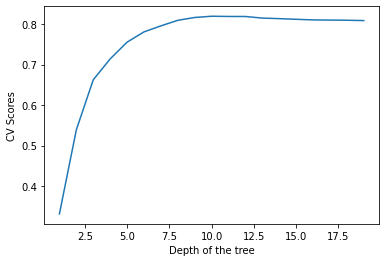

In [161]:
plt.plot (depth, np.abs(cv_scores_dt))                 #plot of depth vs the CV score
plt.xlabel('Depth of the tree')
plt.ylabel('CV Scores')
plt.show()

In [162]:
np.max(np.abs(cv_scores_dt))   

0.8191625888564872

In [163]:
optimal = np.where(np.abs(cv_scores_dt) == np.max(np.abs(cv_scores_dt)))          #finding the index of the optimal value
optimal

(array([9], dtype=int64),)

In [164]:
optimal[0][0] + 1

10

In [165]:
#instantiate an learning model (max_depth = optimal value from the graph/array)
model = DecisionTreeRegressor(max_depth = (optimal[0][0] + 1), min_samples_leaf = 5)

#fitting the model
model.fit(X1, y1)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [166]:
scores_fit_dt = cross_val_score(model, X1, y1, cv = 10, scoring='r2')            #CV score with R squared as the metric
np.abs(scores_fit_dt.mean())

0.8191571508615259

In [167]:
np.round(np.abs(scores_fit_dt.mean()),2)         #CV score for best fit

0.82

In [168]:
np.round(np.max(np.abs(cv_scores_dt)),2) == np.round(np.abs(scores_fit_dt.mean()),2)        #comparing the 2 cross validation scores

True

In [169]:
scores_fit_dt = cross_val_score(model, X1, y1, cv = 10, scoring='neg_root_mean_squared_error')            #CV score with RMSE as the metric
np.abs(scores_fit_dt.mean())

0.2250497985824284

In [170]:
np.round(np.abs(scores_fit_dt.mean()),2)      #CV score for best fit

0.23

In [171]:
y_pred1 = model.predict(X_test)        #predicting the price using test data 
y_pred1

array([12.62211088, 13.26038972, 12.23822453, ..., 13.18689446,
       12.69000642, 13.22620148])

In [172]:
from sklearn.metrics import r2_score   #CV score of the model
np.round(r2_score(y_test,y_pred1),2)

0.82

In [173]:
#RMSE
RMSE = np.sqrt(np.mean((np.array(y_test)-y_pred1)**2))
RMSE

0.22368776177103844